In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
df = pd.read_csv('listings.csv')

In [22]:
df.head()

id                          listing_url     scrape_id last_scraped  \
0   70820.0   https://www.airbnb.com/rooms/70820  2.020000e+13    6/26/2024   
1  117122.0  https://www.airbnb.com/rooms/117122  2.020000e+13    6/26/2024   
2  176306.0  https://www.airbnb.com/rooms/176306  2.020000e+13    6/26/2024   
3  307634.0  https://www.airbnb.com/rooms/307634  2.020000e+13    6/26/2024   
4  390781.0  https://www.airbnb.com/rooms/390781  2.020000e+13    6/26/2024   

            source                                               name  \
0  previous scrape                   City View - Sarah's double room.   
1      city scrape                      City Centre-Waterside Retreat   
2      city scrape  The White Room -  Central Bristol Art House Ga...   
3      city scrape             'The Sunset Room' Peaceful, Clear Home   
4  previous scrape  Cosy large room nr TV studios, Paintworks & st...   

                                         description  \
0  A good sized room with a comfy double bed and ...   
1  My Harbourside apartment centrally located min...   
2  A small double room in an artist's house, with...   
3  Close to Bristol and Bath Railway Path, leadin...   
4  A room with a shared bathroom in an old Victor...   

                               neighborhood_overview  \
0  The neighbourhood is friendly and welcoming; m...   
1  This area is on the water and has splendid vie...   
2  Southville is pretty darn hip, frankly. North ...   
3  Located in the cosmopolitan and bohemian commu...   
4  Meals/food not provided, as the house is next ...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/b33c30be-56a0...   360195  ...   
1  https://a0.muscache.com/pictures/13b41142-0946...   591555  ...   
2  https://a0.muscache.com/pictures/e1e7fdfc-9db5...   708175  ...   
3  https://a0.muscache.com/pictures/e1be9894-84fb...  1582810  ...   
4  https://a0.muscache.com/pictures/77fed43a-04c9...  1954565  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.94                   4.76                4.76   
1                        4.98                   4.97                4.88   
2                        4.94                   4.77                4.73   
3                        4.82                   4.84                4.71   
4                        4.93                   4.72                4.84   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              5   
1     NaN                f                              1   
2     NaN                f                              1   
3     NaN                f                              3   
4     NaN                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            5   
1                                            1   
2                                            1   
3                                            3   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.46  
1                                           0              1.20  
2                                           0              0.39  
3                                           0              0.48  
4                                           0              0.40  

[5 rows x 75 columns]

**DATA CLEANING PROCESS**

In [23]:
missing_values_dict=df.isnull().sum().to_dict()
for column, missing in missing_values_dict.items():
    print(f'{column}:{missing}')

id:0
listing_url:0
scrape_id:0
last_scraped:0
source:0
name:0
description:48
neighborhood_overview:1045
picture_url:0
host_id:0
host_url:0
host_name:0
host_since:0
host_location:490
host_about:1088
host_response_time:417
host_response_rate:417
host_acceptance_rate:256
host_is_superhost:29
host_thumbnail_url:0
host_picture_url:0
host_neighbourhood:2521
host_listings_count:0
host_total_listings_count:0
host_verifications:0
host_has_profile_pic:0
host_identity_verified:0
neighbourhood:1045
neighbourhood_cleansed:0
neighbourhood_group_cleansed:2614
latitude:0
longitude:0
property_type:0
room_type:0
accommodates:0
bathrooms:515
bathrooms_text:2
bedrooms:170
beds:516
amenities:0
price:514
minimum_nights:0
maximum_nights:0
minimum_minimum_nights:1
maximum_minimum_nights:1
minimum_maximum_nights:1
maximum_maximum_nights:1
minimum_nights_avg_ntm:1
maximum_nights_avg_ntm:1
calendar_updated:2614
has_availability:24
availability_30:0
availability_60:0
availability_90:0
availability_365:0
calendar_

In [24]:
df.drop(columns=['host_neighbourhood','calendar_updated','license','neighbourhood_group_cleansed','host_about','neighborhood_overview'], inplace=True)

In [25]:
df.drop(columns=['host_location'], inplace=True)

In [26]:
df.drop(columns=['neighbourhood'], inplace=True)

In [27]:
df.drop(columns=['listing_url','scrape_id','last_scraped','source'], inplace=True)

In [28]:
df.drop(columns=['host_verifications','host_has_profile_pic'], inplace=True)

In [29]:
df.drop(columns=['picture_url','host_id','host_url','host_thumbnail_url','host_picture_url','host_listings_count','calendar_last_scraped','host_total_listings_count'], inplace=True)

In [30]:
df.drop(columns=['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_60','availability_90'], inplace=True)

In [31]:
df.rename(columns={'neighbourhood_cleansed': 'neighborhood'}, inplace=True)

In [32]:
df.rename(columns={'id': 'listing_ID'}, inplace=True)
df.rename(columns={'name': 'listing_name'}, inplace=True)

In [33]:
df['description'] = df['description'].fillna('No Details Provided')

In [ ]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna('Unavailable')

In [35]:
df['host_location'] = df['description'].fillna('Unknown')
df['host_response_time'] = df['host_response_time'].fillna('Unavailable')
df['host_response_rate'] = df['host_response_rate'].fillna('Unavailable')
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna('Unavailable')
df['host_is_superhost'] = df['host_is_superhost'].fillna('Unknown')
df['has_availability'] = df['has_availability'].fillna('Unknown')

In [36]:
df.dropna(subset=['first_review'], axis=0, inplace=True)

In [37]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

In [38]:
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace(r'[^\d.]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

In [39]:
mean= df['price'].mean()
df['price'] = df['price'].fillna(mean)

In [40]:
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [110]:
df[['price', 'maximum_nights','minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'bedrooms', 'beds','bathrooms','number_of_reviews_ltm']].describe()

price  maximum_nights  minimum_nights  number_of_reviews  \
count  1594.000000     1594.000000     1594.000000        1594.000000   
mean    103.993099      459.367629        1.654956          66.357591   
std      51.243599      436.564182        0.693538         107.011971   
min      20.000000        1.000000        1.000000           1.000000   
25%      62.000000       31.000000        1.000000           8.000000   
50%      97.000000      365.000000        2.000000          25.000000   
75%     133.000000     1125.000000        2.000000          76.000000   
max     259.000000     1125.000000        3.000000        1056.000000   

       reviews_per_month     bedrooms         beds    bathrooms  \
count        1594.000000  1594.000000  1594.000000  1594.000000   
mean            2.128664     1.495609     1.863864     1.221769   
std             2.041415     0.900746     1.406973     0.482821   
min             0.020000     0.000000     0.000000     0.000000   
25%             0.712500     1.000000     1.000000     1.000000   
50%             1.470000     1.000000     1.000000     1.000000   
75%             2.950000     2.000000     2.000000     1.500000   
max            14.420000     6.000000     9.000000     4.500000   

       number_of_reviews_ltm  
count            1594.000000  
mean               18.917189  
std                22.794740  
min                 0.000000  
25%                 4.000000  
50%                11.000000  
75%                26.000000  
max               181.000000

In [43]:
#We can see that the minimum price of properties available are $20 whereas the maximum price of the properties are $259
#25% of properties are priced at or below $62 whereas 75% of properties are at or below $133
#The average number of nights hosts demand to reserve properties is 1-2

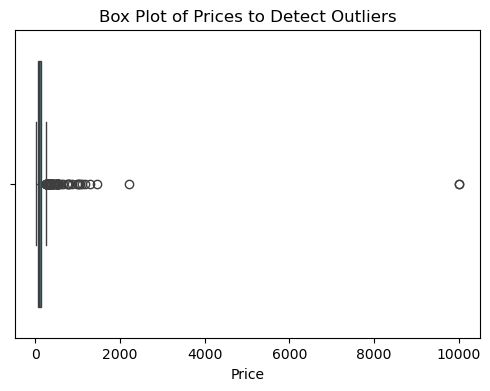

In [78]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices to Detect Outliers')
plt.xlabel('Price')
plt.show()

In [79]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -53.0
Upper Bound: 259.0


In [83]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df['price'].describe()

count    1783.000000
mean      103.104879
std        51.267631
min        20.000000
25%        60.000000
50%        96.000000
75%       132.000000
max       259.000000
Name: price, dtype: float64

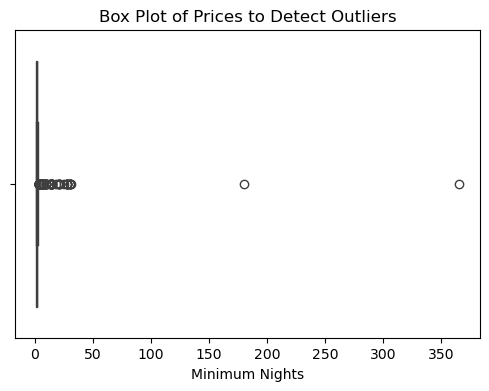

In [86]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['minimum_nights'])
plt.title('Box Plot of Prices to Detect Outliers')
plt.xlabel('Minimum Nights')
plt.show()

In [91]:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
df = df[(df['minimum_nights'] >= lower_bound) & (df['minimum_nights'] <= upper_bound)]

Lower Bound: -0.5
Upper Bound: 3.5


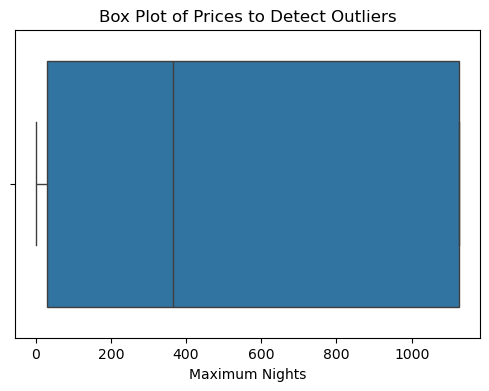

In [113]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['maximum_nights'])
plt.title('Box Plot of Prices to Detect Outliers')
plt.xlabel('Maximum Nights')
plt.show()

**EDA (Exploratory Data Analysis)**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 1 to 2595
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_ID                                    1880 non-null   float64       
 1   listing_name                                  1880 non-null   object        
 2   description                                   1880 non-null   object        
 3   host_name                                     1880 non-null   object        
 4   host_since                                    1880 non-null   object        
 5   host_response_time                            1880 non-null   object        
 6   host_response_rate                            1880 non-null   object        
 7   host_acceptance_rate                          1880 non-null   object        
 8   host_is_superhost                             1880 non-null   object     

In [125]:
columns_of_interest = ['price','number_of_reviews_ltm', 'availability_365',
    'accommodates', 'neighborhood', 'property_type',
    'room_type', 'calculated_host_listings_count', 'minimum_nights', 'maximum_nights',
    'bathrooms', 'bedrooms', 'beds', 'amenities']
stats = {}
for col in columns_of_interest:
    if df[col].dtype in ['int64', 'float64']:  
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()[0] if not df[col].mode().empty else None  
    else:  
        mean = 'N/A'
        median = 'N/A'
        mode = df[col].mode()[0] if not df[col].mode().empty else None
    
    stats[col] = {'Mean': mean, 'Median': median, 'Mode': mode}

stats_df = pd.DataFrame(stats).T
print(stats_df)

                                      Mean Median  \
price                           103.993099   97.0   
number_of_reviews_ltm            18.917189   11.0   
availability_365                182.584693  177.5   
accommodates                      3.313676    2.0   
neighborhood                           N/A    N/A   
property_type                          N/A    N/A   
room_type                              N/A    N/A   
calculated_host_listings_count   19.710163    2.0   
minimum_nights                    1.654956    2.0   
maximum_nights                  459.367629  365.0   
bathrooms                         1.221769    1.0   
bedrooms                          1.495609    1.0   
beds                              1.863864    1.0   
amenities                              N/A    N/A   

                                                                             Mode  
price                                                                       100.0  
number_of_reviews_ltm               

In [50]:
#Therefore we understand that the average price of all properties is $104, the median tells us that anything below $97 is a lower price 
#whereas anything above it is a higher price
#properties are available approximately 183 days a year, 
#the average number of people that can be accomadated is 3, and most of the properties accomodate 2 people
#the most popular neighborhood is Ashley and the most popular property type is an entire rental unit. Entire homes/apts are the most popular room type.
#the avg minimum number of nights required for booking is approximately 2, whereas avg maximum nights for booking are 460
#The fact that the mode and median for maximum nights are both 365 suggests that setting a maximum stay of one year is common among hosts.
#the avg number of beds in all properties is 2 whereas bedrooms and bathrooms are 1

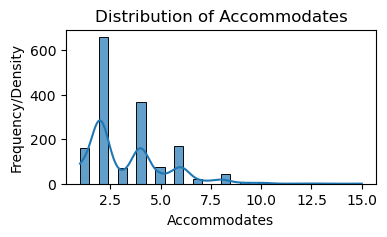

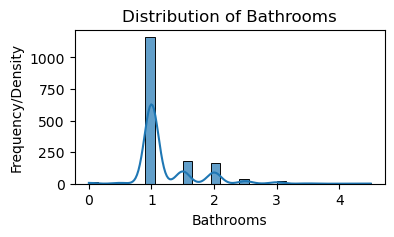

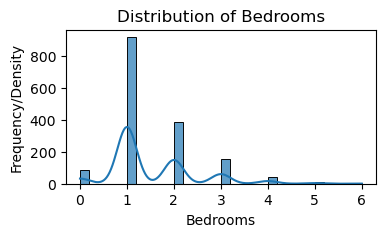

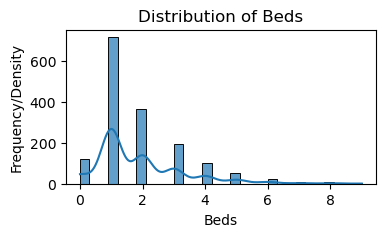

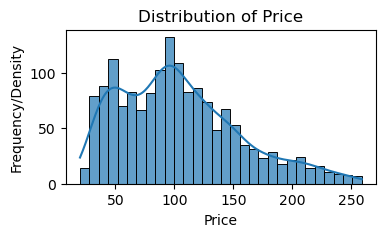

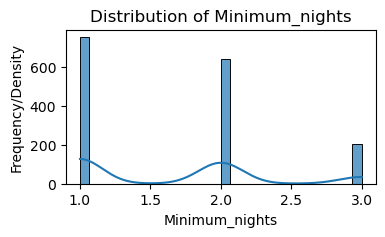

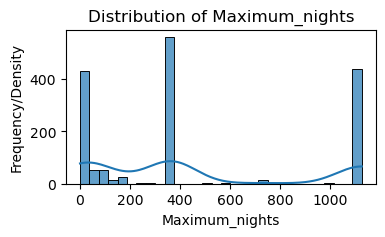

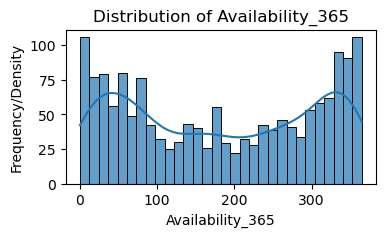

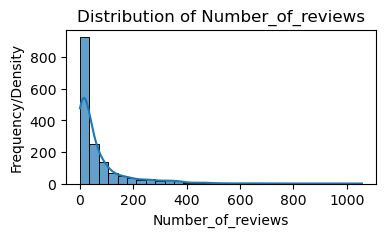

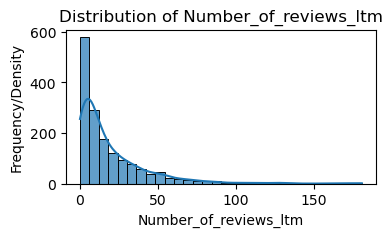

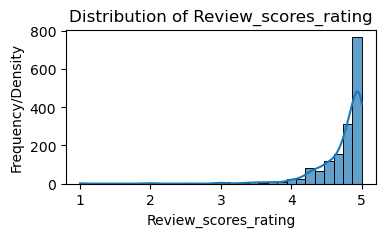

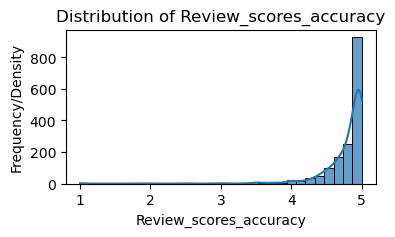

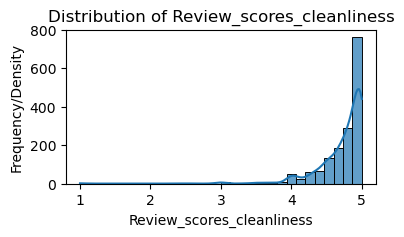

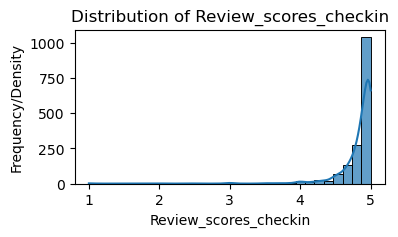

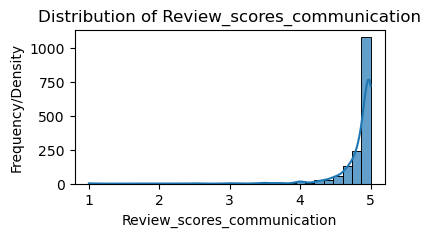

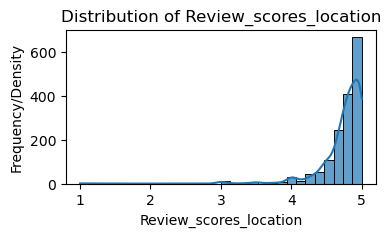

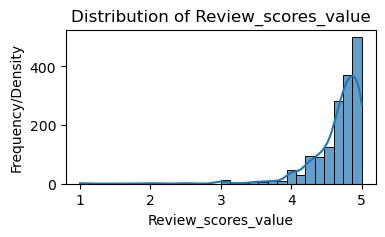

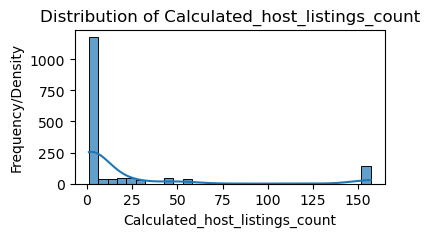

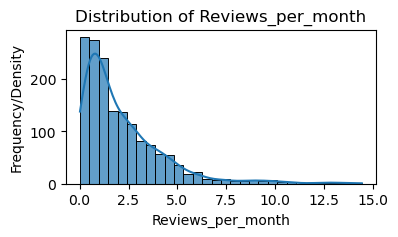

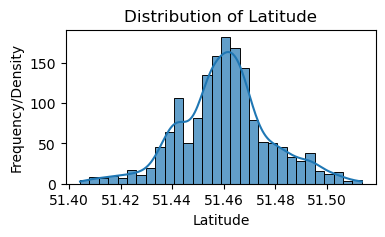

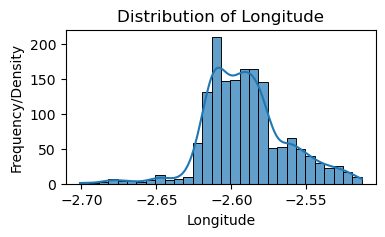

In [133]:
columns_to_plot = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 
                   'maximum_nights', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 
                   'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                   'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month','latitude','longitude'] 

for column in columns_to_plot:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[column], bins=30, kde=True, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency/Density')
    plt.show()

In [56]:
#From the above histogram combined KDE plots, we can observe that most properties can accomodate 2 people, 
#whereas in almost 400 listings, 4 people can be accomodated
#More than 1200 listings have 1 bathroom
#Almost 1000 listings have 1 bedroom whereas 400 listings have 2 bedrooms
#Over 700 listings have 1 bed
#Review score ratings for all factors are mostly 4.5 or 5 star ratings

C:\Users\alish\AppData\Local\Temp\ipykernel_10884\426276182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='plasma')


Text(0.5, 1.0, 'Room Types')

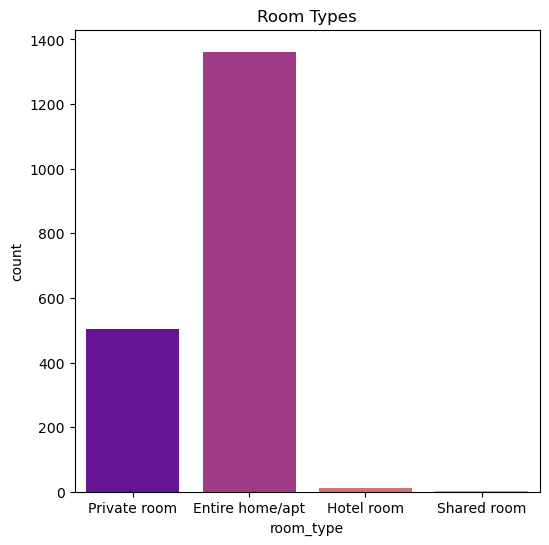

In [61]:
sns.countplot(x='room_type', data=df, palette='plasma')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Room Types')

In [62]:
#The least number of room types available in bristol are shared rooms

In [52]:
df['neighborhood'].unique()

array(['Hotwells & Harbourside', 'Southville', 'Easton', 'Redland',
       'Westbury-on-Trym & Henleaze', 'Ashley', 'Lawrence Hill',
       'Clifton', 'Knowle', 'Stoke Bishop', 'Henbury & Brentry',
       'Eastville', 'Southmead', 'Clifton Down', 'Cotham',
       'Windmill Hill', 'Avonmouth & Lawrence Weston',
       'Bishopston & Ashley Down', 'Brislington East', 'Bedminster',
       'Central', 'Brislington West', 'St George West', 'Lockleaze',
       'Horfield', 'St George Troopers Hill', 'Stockwood', 'Hillfields',
       'Frome Vale', 'Hengrove & Whitchurch Park', 'St George Central',
       'Hartcliffe & Withywood', 'Filwood', 'Bishopsworth'], dtype=object)

In [53]:
df['neighborhood'].value_counts()

neighborhood
Ashley                         223
Central                        189
Clifton Down                   143
Clifton                        133
Southville                     111
Lawrence Hill                   90
Cotham                          90
Hotwells & Harbourside          73
Windmill Hill                   72
Easton                          71
Redland                         62
Eastville                       58
Bishopston & Ashley Down        50
Frome Vale                      43
Avonmouth & Lawrence Weston     41
Bedminster                      39
Brislington West                39
Horfield                        35
Westbury-on-Trym & Henleaze     33
St George West                  29
Knowle                          28
Stoke Bishop                    26
St George Central               26
Bishopsworth                    24
Lockleaze                       21
Southmead                       20
Brislington East                17
Filwood                         17
Hengrov

In [54]:
#The most popular neighborhood for bookings is Ashley whereas the least popular neighborhood is Hartcliffe & Withywood.

In [51]:
df.columns

Index(['listing_ID', 'listing_name', 'description', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_identity_verified', 'neighborhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculate

C:\Users\alish\AppData\Local\Temp\ipykernel_10884\3890997529.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='neighborhood', data=df, palette='plasma')


Text(0.5, 1.0, 'Number of Properties Available')

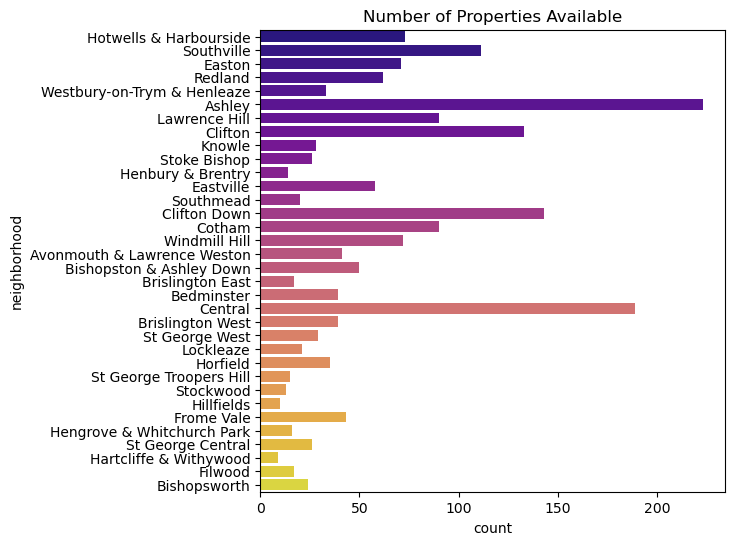

In [59]:
sns.countplot(y='neighborhood', data=df, palette='plasma')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Number of Properties Available')

In [60]:
#Ashley neighborhood has the greatest number of properties available whereas Hartcliffe & Whithywood has the lowest.

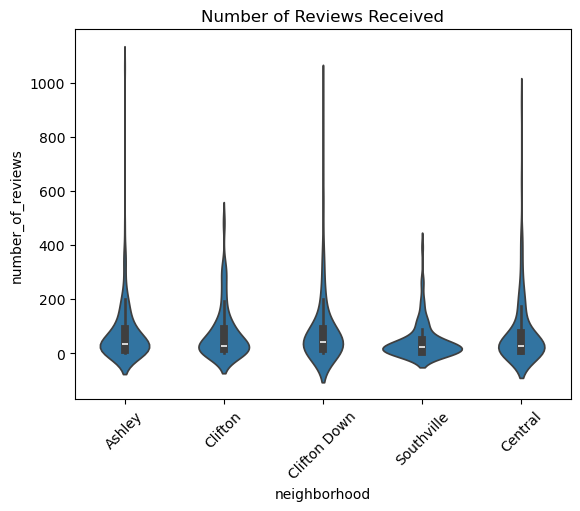

In [142]:
top_neighborhoods= ['Ashley', 'Central', 'Clifton Down', 'Clifton', 'Southville']
filtered_df = df[df['neighborhood'].isin(top_neighborhoods)]
sns.violinplot(x='neighborhood', y='number_of_reviews', data=filtered_df)
plt.title('Number of Reviews Received')
plt.xticks(rotation=45)
plt.show()

In [58]:
#The above cat plot shows that Ashley and Central have the greatest number of reviews followed by Clifton Down

Text(0.5, 1.0, 'Distribution of Rooms in Top 5 Neighborhoods')

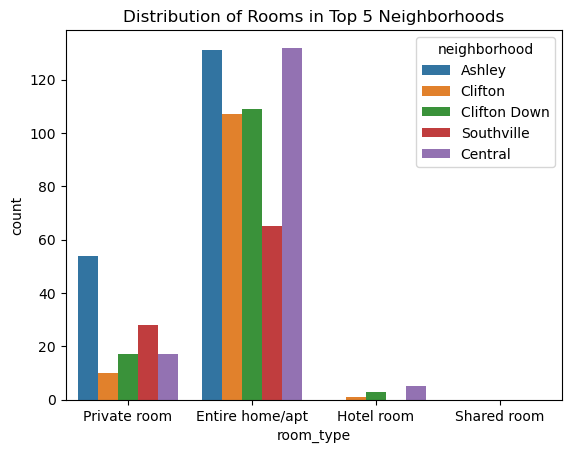

In [135]:
sns.countplot(x=df['room_type'], hue='neighborhood', data=filtered_df)
plt.title('Distribution of Rooms in Top 5 Neighborhoods')

In [64]:
#In the top 5 neighborhoods, we see that Ashley has the most listings for entire homes/apts and private rooms.
#Central has the most listings for hotel rooms and second most listings for entire homes/apts.

C:\Users\alish\AppData\Local\Temp\ipykernel_10884\2022412887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=filtered_df,x='neighborhood',y='availability_365',palette='plasma')


Text(0.5, 1.0, 'Availability of Properties in All Neighborhoods')

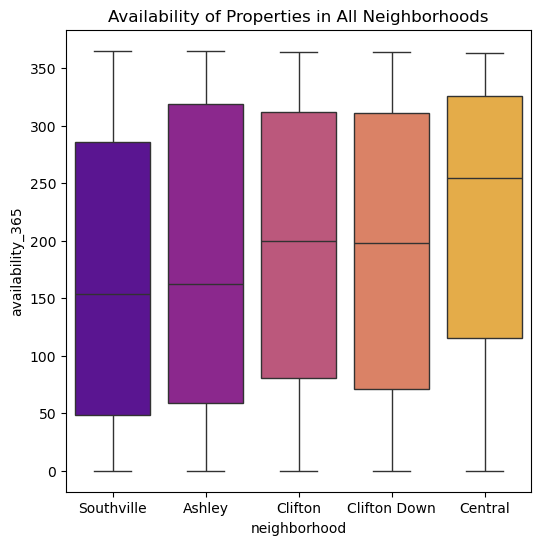

In [65]:
plt.figure(figsize=(6,6))
ax=sns.boxplot(data=filtered_df,x='neighborhood',y='availability_365',palette='plasma')
plt.title('Availability of Properties in All Neighborhoods')

In [66]:
#From the above boxplot we can see that 50% of listings have between 50 and 280 available nights over the next 365 days in southville. 
#In Ashley neighborhood, 50% of listings have between 60 and 320 available nights over the next 365 days.
#The median line in Ashley is closer to Q1 which means that the distribution is right-skewed thus more listings have lower availability.
#In Central the median line is closer to Q3 which means that the distribution is left-skewed thus more listings have higher availability.

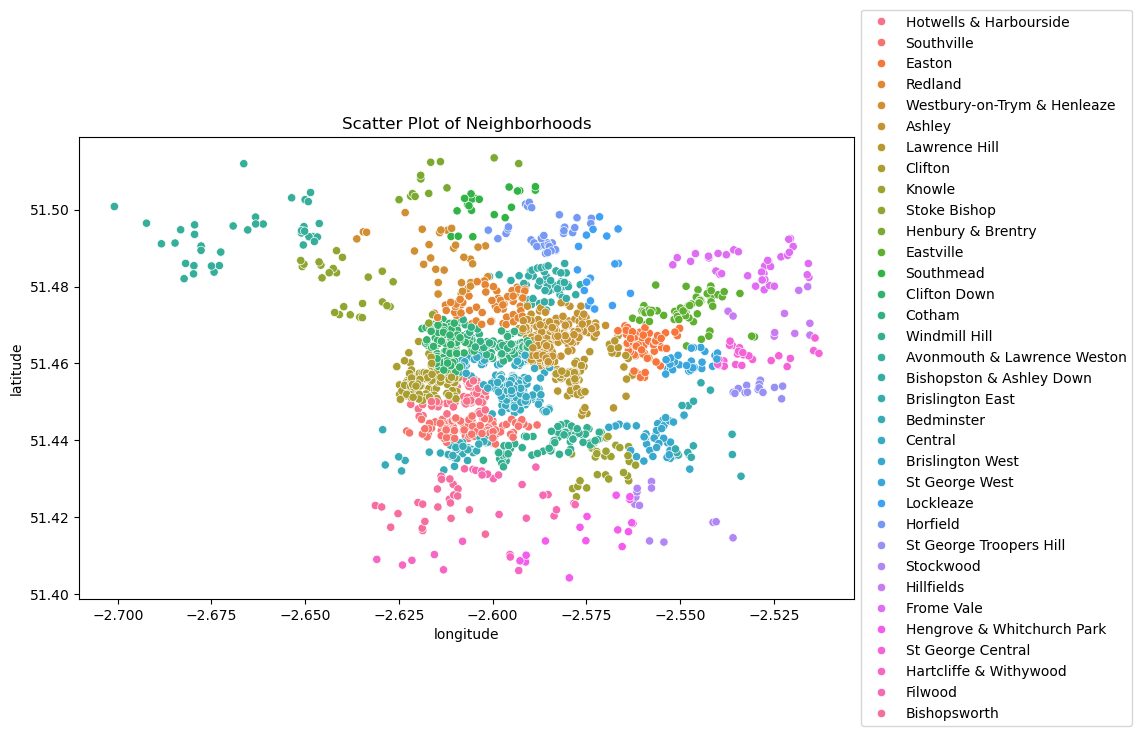

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
df.neighborhood=df['neighborhood']
scatter_plot=sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighborhood)
scatter_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Scatter Plot of Neighborhoods')
plt.show()

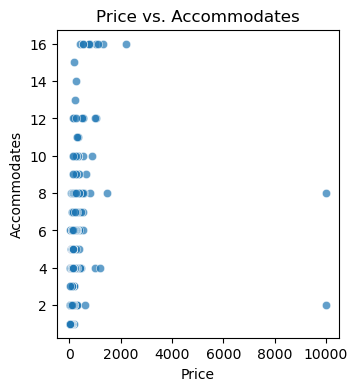

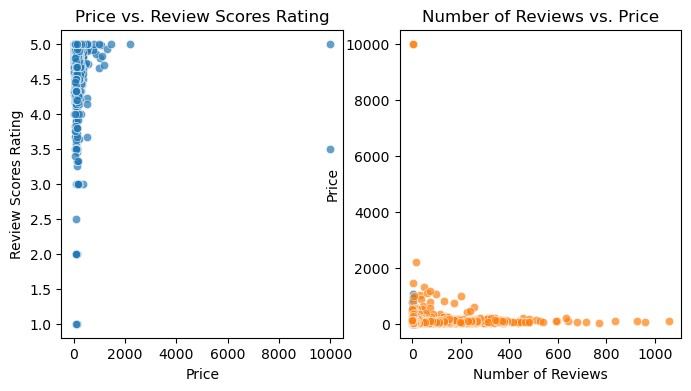

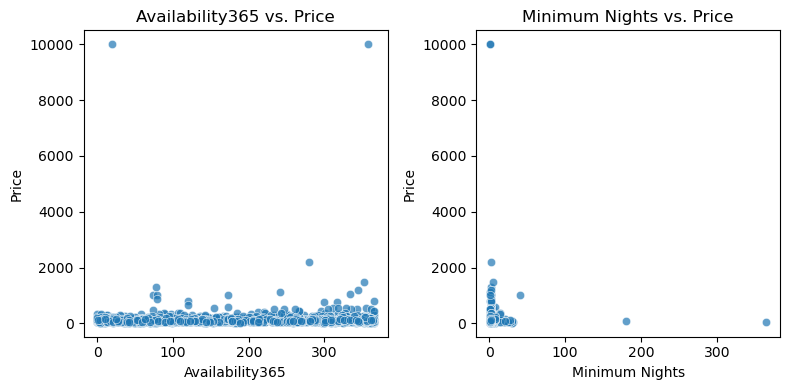

In [68]:
# Scatter plot: Price vs. Accommodates
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='price', y='accommodates', alpha=0.7)
plt.title('Price vs. Accommodates')
plt.xlabel('Price')
plt.ylabel('Accommodates')

# Scatter plot: Price vs. Review Scores Rating
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='price', y='review_scores_rating', alpha=0.7)
plt.title('Price vs. Review Scores Rating')
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')

# Scatter plot: Accomodates vs. Number of Reviews
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='accommodates', y='number_of_reviews', alpha=0.7)
plt.title('Accomodates vs. Number of Reviews')
plt.xlabel('Accomodates')
plt.ylabel('Number of Reviews')

# Scatter plot: Number of Reviews vs. Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.7)
plt.title('Number of Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')

# Scatter plot: Availability365 vs. Price
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.7)
plt.title('Availability365 vs. Price')
plt.xlabel('Availability365')
plt.ylabel('Price')

# Scatter plot: Minimum Nights vs. Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.7)
plt.title('Minimum Nights vs. Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [69]:
#availability_365 vs. price shows that some of the listings available for the next 356 days are priced differently although the dominant trend is 
#that prices remain the same.
#price vs review scores ratings shows that listings with higher ratings show a trend towards higher pricing.

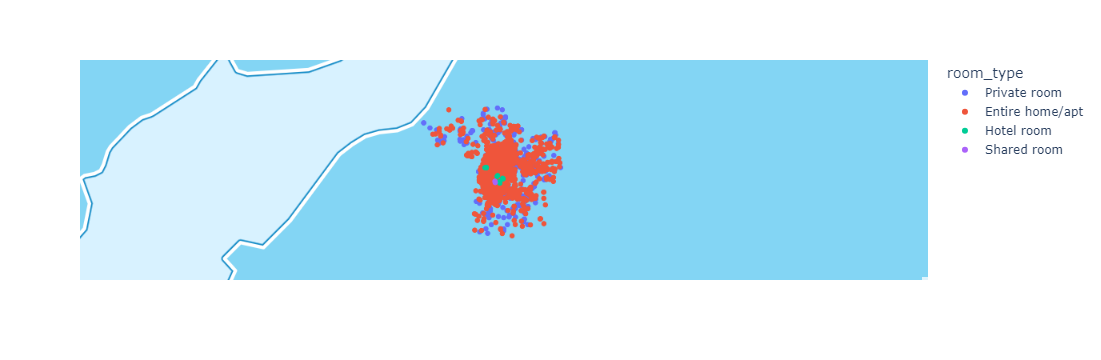

In [70]:
import plotly
import plotly.express as px
fig = px.scatter_mapbox(df,
                       lat='latitude',
                       lon='longitude',
                       color='room_type',
                       size_max=200,
                       zoom=9,
                       mapbox_style='https://demotiles.maplibre.org/style.json')
fig.show()

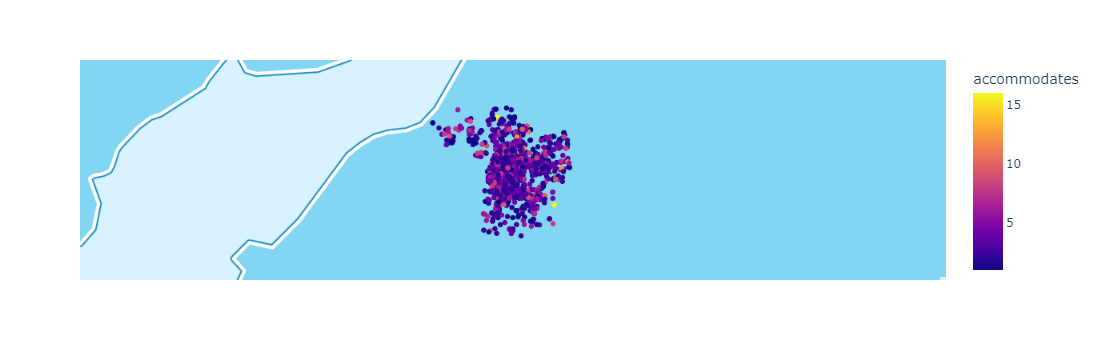

In [71]:
import plotly
import numpy as np
import plotly.express as px
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',color='accommodates',zoom=9,
                       mapbox_style='https://demotiles.maplibre.org/style.json')
fig.show()

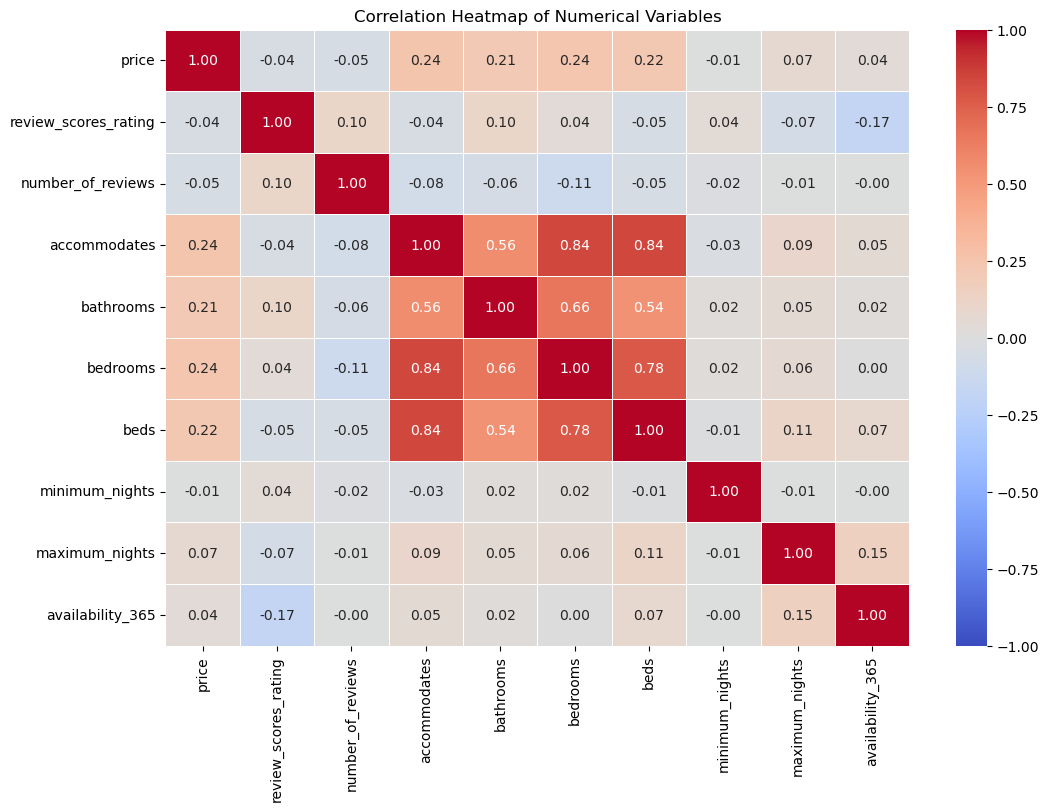

In [72]:
columns_to_plot2 = ['price', 'review_scores_rating', 'number_of_reviews', 
                   'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                   'minimum_nights', 'maximum_nights', 'availability_365']
df_numerical = df[columns_to_plot2]
corr_matrix = df_numerical.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,vmax=1,vmin=-1,fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [73]:
#Darker colors represent stronger positive correlations, while lighter colors represent stronger negative correlations.
#A coefficient close to 1 or -1 indicates a strong relationship, while a coefficient close to 0 indicates a weak relationship.
#There are no significant correlations among the variables.

In [74]:
top_10_hosts=df['host_name'].value_counts()[:10]
top_10_hosts

host_name
Hopewell               141
Your Apartment          71
Mairead June            46
Sarah                   25
Louise                  23
Luke                    23
Prescott Apartments     20
Neil                    19
Emma                    17
Michael                 17
Name: count, dtype: int64

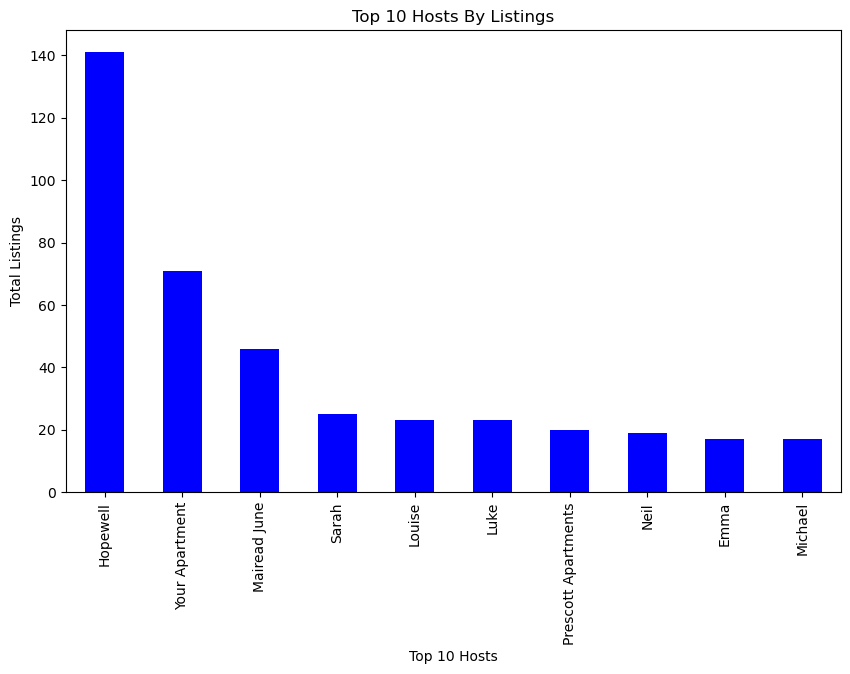

In [75]:
top_10_hosts.plot(kind='bar',color='b',figsize=(10,6))
plt.xlabel('Top 10 Hosts')
plt.ylabel('Total Listings')
plt.title('Top 10 Hosts By Listings')
plt.show()

In [ ]:
#Hosts with multiple listings are more likely to be running a business, are unlikely to be living in the property, 
#and in violation of most short term rental laws designed to protect residential housing.

In [107]:
most_popular_listings = df.loc[df.groupby('neighborhood')['number_of_reviews'].idxmax()]
most_popular_listings = most_popular_listings[['listing_name', 'host_name','neighborhood', 'number_of_reviews', 'room_type','price']]
most_popular_listings = most_popular_listings.sort_values(by='number_of_reviews', ascending=False).reset_index(drop=True)
most_popular_listings

listing_name         host_name  \
0         Comfortable and Clean Flat - Great Location              Cath   
1             The Garden Room in Redland with parking         Kelly-Ann   
2                CENTRAL - FREE PARKING - STYLISH APT             Simon   
3   Stunning traditional flat in the heart of Bristol             Marco   
4       x Just off Gloucester Rd, small modern studio           Carolyn   
5                   1 bed apartment - Central Bristol          Scarlett   
6               Lovely Victorian 3 bed terraced house         Catherine   
7     Clifton Village, superfast internet, car permit            Joanna   
8                           Double loft room, Bristol            Sheila   
9       Bristol studio+kitchen+parking+private access              Jaya   
10        Spacious self-contained attic with en suite             Sarah   
11                Huge, bright, spacious double room.              Jody   
12    Private cosy flat, free road parking and garden     Liz And James   
13           Modern & spacious apartment with parking      Mairead June   
14    Large boutique apartment, park views and garden             Jason   
15                             Easton's Little Secret           Alistar   
16                                  Beaconsfield Road          Jennifer   
17                 Amazing location  Heart of Bristol  Jerry And Jacqui   
18   City Hideaway with hot tub (family/couples only)           Richard   
19  Stylish House ⭐️ Short walk - park & Glouceste...              Kate   
20               Lovely private room in a family home           Suzanna   
21        Log Cabin - set before a small stone circle            Adrian   
22                            Lovely light attic room            Stella   
23           Beautiful spacious cottage with hot tub.         Catherine   
24                   Modern Holiday Home with Hot Tub            Ashley   
25     Beautiful double bedroom with private bathroom             Laura   
26     Modern immaculate studio with aircon & parking              Andy   
27        South Bristol midway between airport & city             Penny   
28  Calm, spacious ensuite near Southmead Hosp. 1 ...               Sue   
29                  Homestay - Single Room in Bristol              John   
30  Single room near airport bus route and bottleyard        Crescentia   
31                                       Franks Place             Kerry   
32                              Secluded garden cabin            Merlin   
33                      Lovely 2 Bed house in Bristol               Jos   

                   neighborhood  number_of_reviews        room_type  price  
0                        Ashley               1056  Entire home/apt   89.0  
1                  Clifton Down                957  Entire home/apt   78.0  
2                       Central                924  Entire home/apt  104.0  
3                        Cotham                834  Entire home/apt   83.0  
4                       Redland                678  Entire home/apt   59.0  
5                 Lawrence Hill                642  Entire home/apt  111.0  
6                       Filwood                526  Entire home/apt  100.0  
7                       Clifton                483  Entire home/apt  157.0  
8   Westbury-on-Trym & Henleaze                477     Private room   60.0  
9                        Knowle                473  Entire home/apt   75.0  
10                   Frome Vale                465     Private room   45.0  
11                    Southmead                436     Private room   39.0  
12                Windmill Hill                435  Entire home/apt   61.0  
13                   Southville                392  Entire home/apt  115.0  
14             Brislington West                382  Entire home/apt   79.0  
15                       Easton                377  Entire home/apt   47.0  
16               St George West                368     Private room   35.0  
17       Hotwells & Harboursi

In [ ]:
#From the above we can see the name of the most popular listing by number of reviews, it's neighborhood, price and room type.
#Host Cath has 1056 reviews for an entire home/apt retailing at $89

In [95]:
popular_neighborhoods = ['Ashley', 'Central', 'Clifton Down', 'Clifton', 'Southville']
filtered_df = df[df['neighborhood'].isin(popular_neighborhoods)]
mean_prices = filtered_df.groupby('neighborhood')['price'].mean()
print(mean_prices)

neighborhood
Ashley          100.664865
Central         119.616883
Clifton         133.669492
Clifton Down    123.844961
Southville      105.064516
Name: price, dtype: float64


In [ ]:
#The above displays the average price of properties in each neighborhood.

In [114]:
neighborhood_prices = df.groupby('neighborhood')['price'].mean().sort_values()
cheapest_neighborhoods = neighborhood_prices.head(10)
print("10 Cheapest Neighborhoods:")
print(cheapest_neighborhoods)

10 Cheapest Neighborhoods:
neighborhood
Henbury & Brentry             55.769231
St George Troopers Hill       59.846154
Southmead                     65.235294
Hengrove & Whitchurch Park    65.687500
Lockleaze                     66.235294
St George West                69.217391
Frome Vale                    74.948718
Easton                        76.771930
Stoke Bishop                  81.100000
Filwood                       84.066667
Name: price, dtype: float64


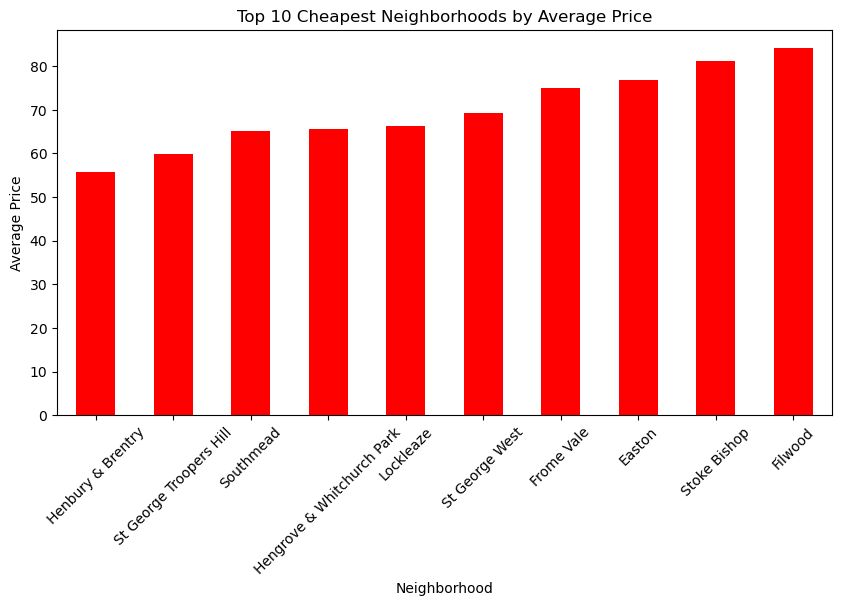

In [124]:
plt.figure(figsize=(10, 5))
cheapest_neighborhoods.plot(kind='bar', color='red')
plt.title('Top 10 Cheapest Neighborhoods by Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [115]:
most_expensive_neighborhoods = neighborhood_prices.tail(10)
print("\n10 Most Expensive Neighborhoods:")
print(most_expensive_neighborhoods)


10 Most Expensive Neighborhoods:
neighborhood
Cotham                    103.324675
Southville                105.064516
Hillfields                111.000000
Brislington West          111.657143
Brislington East          113.071429
Hotwells & Harbourside    114.766667
Central                   119.616883
Lawrence Hill             119.976190
Clifton Down              123.844961
Clifton                   133.669492
Name: price, dtype: float64


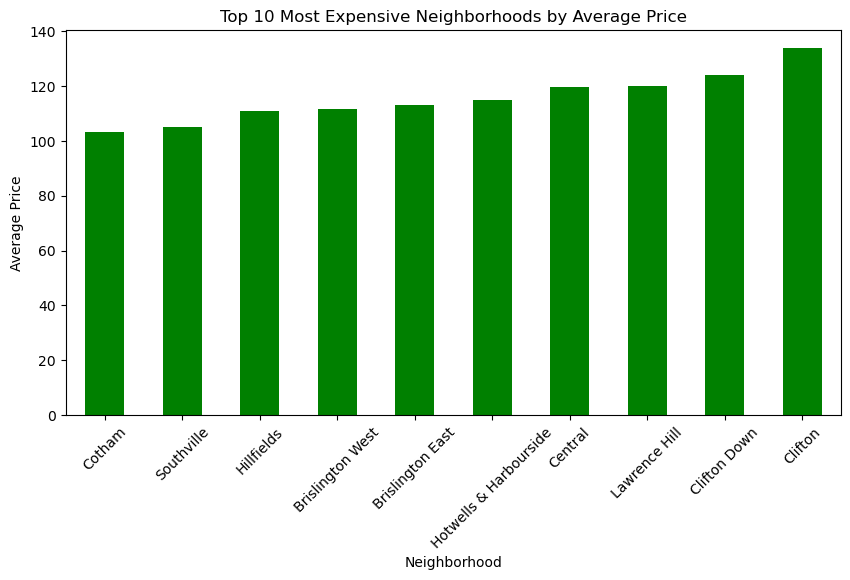

In [123]:
plt.figure(figsize=(10, 5))
most_expensive_neighborhoods.plot(kind='bar', color='green')
plt.title('Top 10 Most Expensive Neighborhoods by Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [108]:
df.to_csv('cleaned_data.csv', index=False)